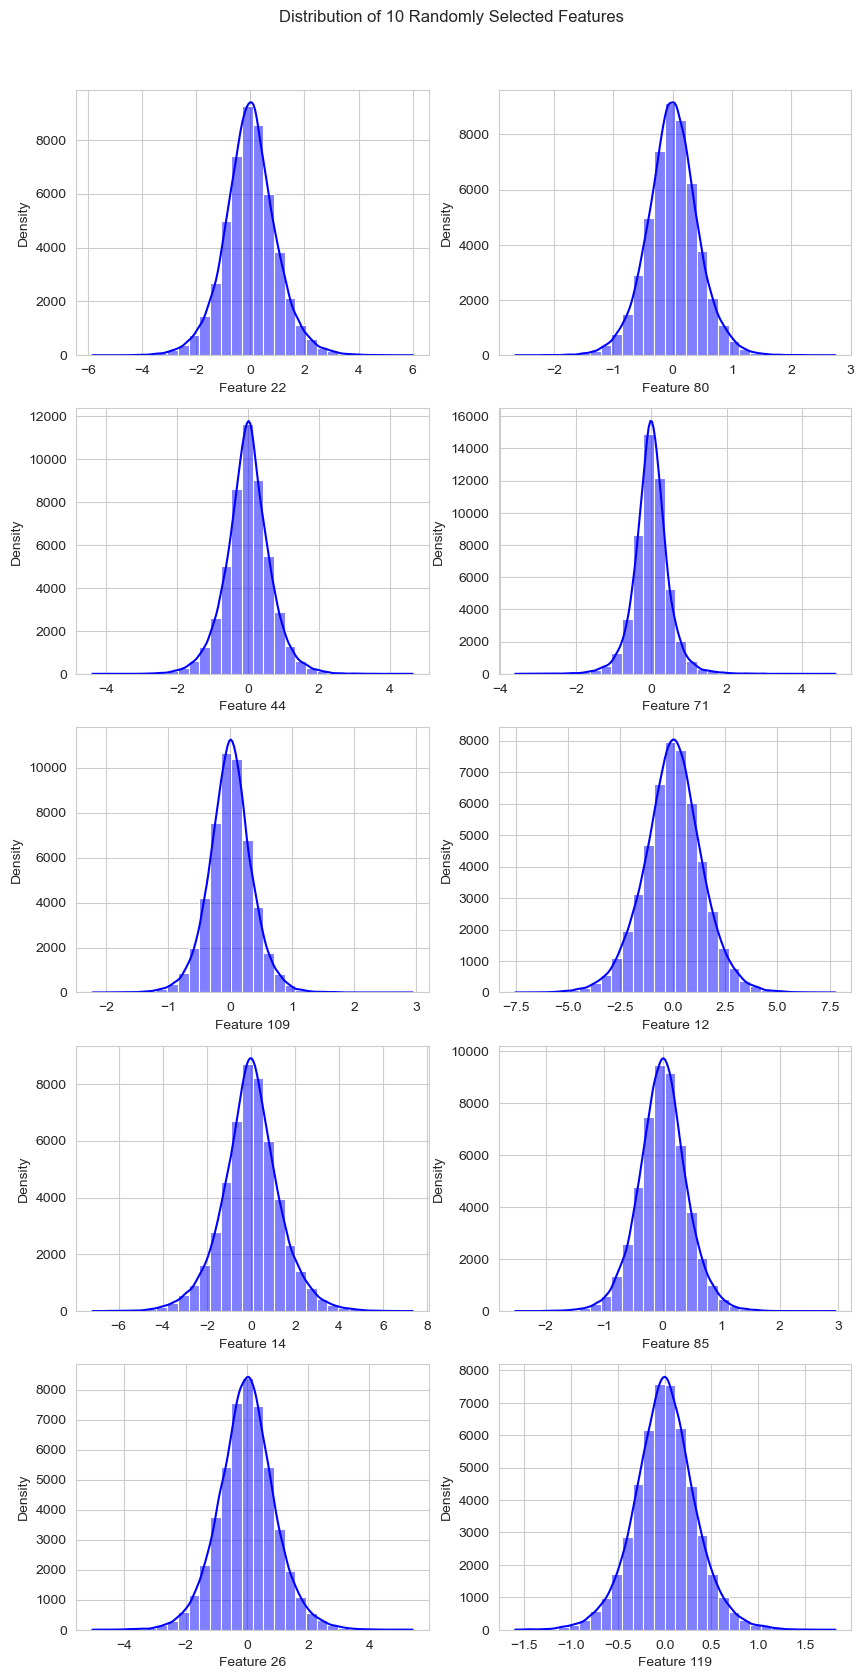

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

file_location = "../../raw_data/"
debug = False
# ----------------------------------------------------------------------------------
# Load datasets
X_train = np.load(os.path.join(file_location, "train_data.npy"))
y_train = np.load(os.path.join(file_location, "train_label.npy"))
X_test = np.load(os.path.join(file_location, "test_data.npy"))
y_test = np.load(os.path.join(file_location, "test_label.npy"))

if debug:
    print('X_train: ', X_train.shape)
    print('y_train: ', y_train.shape)
    print('X_test: ', X_test.shape)
    print('y_test: ', y_test.shape)
    print(y_train[:10, :])

# Randomly select 10 features from the dataset
num_features = X_train.shape[1]
selected_features = random.sample(range(num_features), 10)

# Plot the distribution of the selected features
sns.set_style("whitegrid")
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.ravel()

for idx, feature_idx in enumerate(selected_features):
    sns.histplot(X_train[:, feature_idx], kde=True,
                 bins=30, color='blue', ax=axes[idx])
    axes[idx].set_xlabel(f"Feature {feature_idx}")
    axes[idx].set_ylabel("Density")

plt.suptitle("Distribution of 10 Randomly Selected Features", y=0.92)
# plt.tight_layout()

# Save the plots to the current folder
plt.savefig("./plots/random_feature_distributions.png", dpi=300)

plt.show()


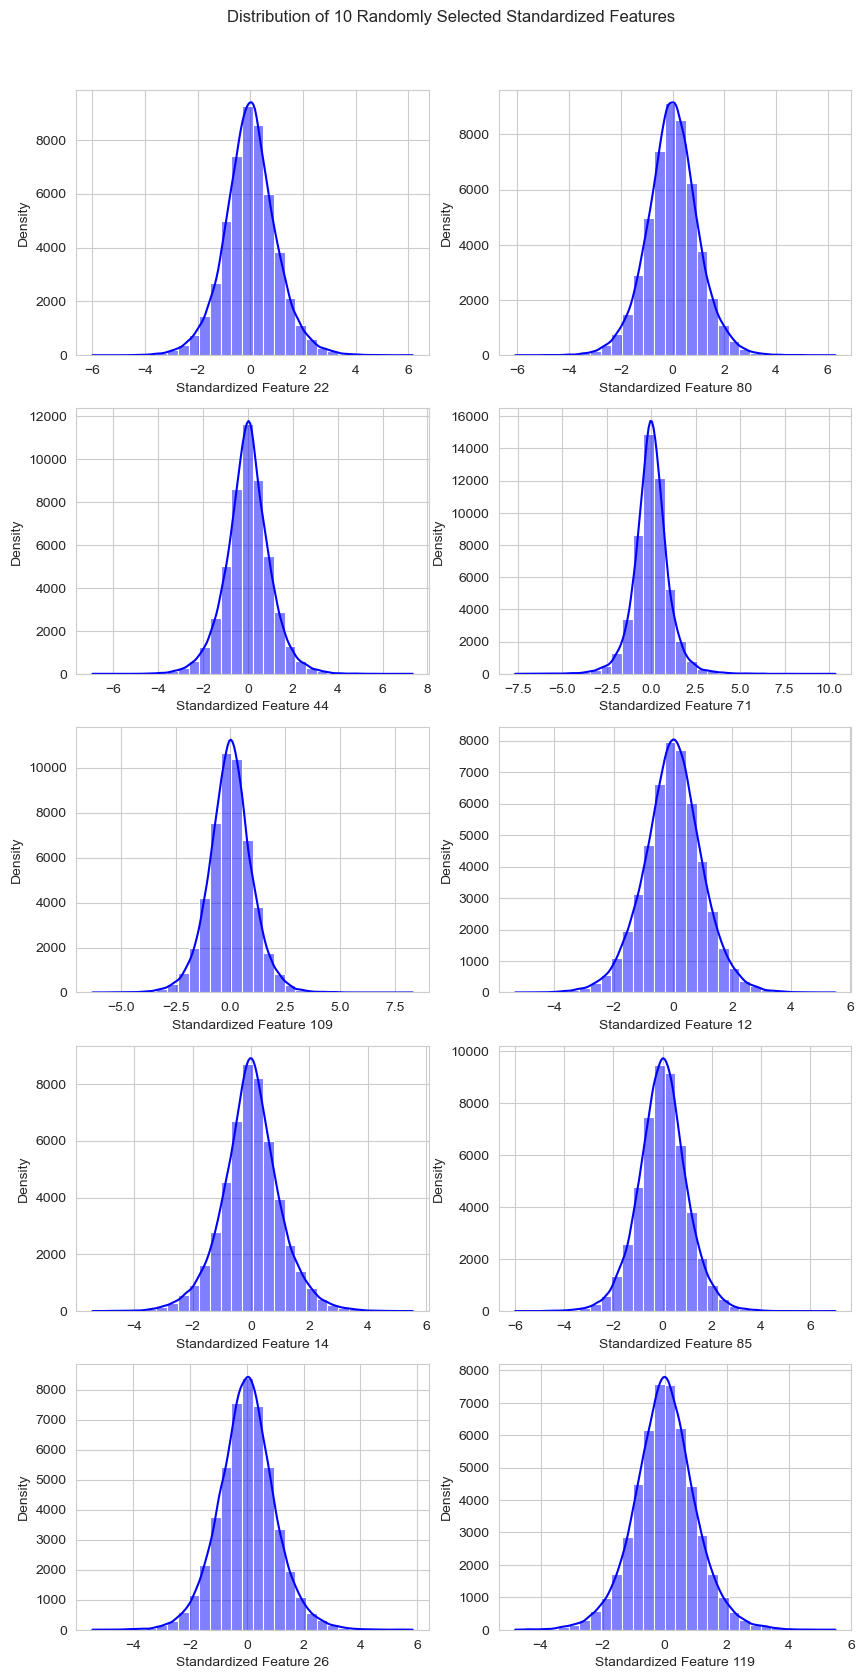

In [5]:
# Standardize the selected features
X_train_standardized = X_train.copy()
for feature_idx in selected_features:
    mean = np.mean(X_train[:, feature_idx])
    std = np.std(X_train[:, feature_idx])
    X_train_standardized[:, feature_idx] = (
        X_train[:, feature_idx] - mean) / std

# Plot the distribution of the standardized selected features
sns.set_style("whitegrid")
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.ravel()

for idx, feature_idx in enumerate(selected_features):
    sns.histplot(X_train_standardized[:, feature_idx],
                 kde=True, bins=30, color='blue', ax=axes[idx])
    axes[idx].set_xlabel(f"Standardized Feature {feature_idx}")
    axes[idx].set_ylabel("Density")

plt.suptitle(
    "Distribution of 10 Randomly Selected Standardized Features", y=0.92)
# plt.tight_layout()

# Save the standardized plots to the current folder
plt.savefig("./plots/random_standardized_feature_distributions.png", dpi=300)

plt.show()
